In [52]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='ce792dbf-68f9-43b6-878b-bd37a86f5518', project_access_token='p-79d855bb83450c56f6d96f98ba9b482490916e27')
pc = project.project_context


In [53]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [54]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [55]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [56]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [57]:
import pandas as pd

In [58]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ff09a40248de423e925b473164e2c5b7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Vsy5tKnPhmoIo7T7RJ23CPwyAlhJG4Ctd5z4mEyefQUA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff09a40248de423e925b473164e2c5b7.get_object(Bucket='tnt-donotdelete-pr-3fjwx5ds9cuwst',Key='dados_coletados.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
0,43,30,Consolação,-23.5581,-46.6606,16,113043,35,86,30,NORMAL,25,2018-9-6,55,00bed2eb994a1caf9fad5f5a85013ff5,1-671d5732bf26567a437cf057cdd7fb11,2406
1,26,10,Ana Rosa,-23.5813,-46.6383,31,64868,25,55,33,NORMAL,33,2019-4-19,59,00bed2eb994a1caf9fad5f5a8503b2ba,1-48a30f941910d1eac38cd1f84b2a9114,11989
2,29,34,Consolação,-23.5581,-46.6606,14,112959,44,33,26,NORMAL,17,2018-11-3,65,00bed2eb994a1caf9fad5f5a8504df65,1-fcb1eee7b4a1fb632dc0d613bce43c81,2463
3,11,20,Consolação,-23.5581,-46.6606,40,112288,13,74,7,NORMAL,40,2018-11-8,37,00bed2eb994a1caf9fad5f5a850523ad,1-240a6a77d9b9353b310b424e654a930c,2468
4,7,35,Luz,-23.5365,-46.6332,34,127518,60,44,34,NORMAL,26,2018-12-6,51,00bed2eb994a1caf9fad5f5a850d2f7d,1-9e431e7430b83522b4d51cfdda3e2ed0,11136


In [59]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
495,23,41,Tatuapé,-23.5402,-46.5765,32,69883,5,39,23,REABASTECER,37,2019-6-16,56,04ccb658c36b7bc2227043b0177ee6ed,1-a47eb95f1ba7bd614620777e16feb3e2,6286
496,35,28,Barra Funda,-23.5542,-46.6707,17,146960,28,31,34,NORMAL,19,2018-7-27,65,04ccb658c36b7bc2227043b01782c782,1-dd085f37f9a076691694b42c13b8e4bf,5247
497,8,6,São Judas,-23.6255,-46.6411,23,16722,29,14,9,NORMAL,11,2019-8-8,65,04ccb658c36b7bc2227043b0178682e5,1-11e97b3e5939a1043a6807fb1e42880d,13538
498,14,36,São Judas,-23.6255,-46.6411,39,14828,34,31,15,NORMAL,13,2019-9-19,35,04ccb658c36b7bc2227043b0178a2705,1-eb2c5f00f9c5c2aa10d824e15a0f85e2,13579
499,40,29,São Judas,-23.6255,-46.6411,30,15558,15,78,43,NORMAL,37,2019-9-23,65,04ccb658c36b7bc2227043b0178a86c8,1-8df589a77c438d05e8e8d2d0668a7801,13583


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [60]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
Açaí-Guaraná    500 non-null int64
Citrus          500 non-null int64
Estação         500 non-null object
LAT             500 non-null float64
LONG            500 non-null float64
Maçã-Verde      500 non-null int64
Movimentação    500 non-null int64
Original_269    500 non-null int64
Original_473    500 non-null int64
Pêssego         500 non-null int64
TARGET          500 non-null object
Tangerina       500 non-null int64
Tempo           500 non-null object
Zero            500 non-null int64
_id             500 non-null object
_rev            500 non-null object
row             500 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 66.5+ KB


In [61]:
df_training_dataset.nunique()

Açaí-Guaraná     42
Citrus           43
Estação          25
LAT              25
LONG             25
Maçã-Verde       42
Movimentação    490
Original_269     64
Original_473     80
Pêssego          42
TARGET            2
Tangerina        42
Tempo           352
Zero             63
_id             500
_rev            493
row             493
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [62]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [63]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
_id             0
_rev            0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
_id             0
_rev            0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [64]:
df_training_dataset_imputed.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
495,23,41,Tatuapé,-23.5402,-46.5765,32,69883,5,39,23,REABASTECER,37,2019-6-16,56,04ccb658c36b7bc2227043b0177ee6ed,1-a47eb95f1ba7bd614620777e16feb3e2,6286
496,35,28,Barra Funda,-23.5542,-46.6707,17,146960,28,31,34,NORMAL,19,2018-7-27,65,04ccb658c36b7bc2227043b01782c782,1-dd085f37f9a076691694b42c13b8e4bf,5247
497,8,6,São Judas,-23.6255,-46.6411,23,16722,29,14,9,NORMAL,11,2019-8-8,65,04ccb658c36b7bc2227043b0178682e5,1-11e97b3e5939a1043a6807fb1e42880d,13538
498,14,36,São Judas,-23.6255,-46.6411,39,14828,34,31,15,NORMAL,13,2019-9-19,35,04ccb658c36b7bc2227043b0178a2705,1-eb2c5f00f9c5c2aa10d824e15a0f85e2,13579
499,40,29,São Judas,-23.6255,-46.6411,30,15558,15,78,43,NORMAL,37,2019-9-23,65,04ccb658c36b7bc2227043b0178a86c8,1-8df589a77c438d05e8e8d2d0668a7801,13583


In [65]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [66]:
df_training_dataset_rmcolumns.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,_id,_rev,row
495,23,41,32,5,39,23,REABASTECER,37,56,04ccb658c36b7bc2227043b0177ee6ed,1-a47eb95f1ba7bd614620777e16feb3e2,6286
496,35,28,17,28,31,34,NORMAL,19,65,04ccb658c36b7bc2227043b01782c782,1-dd085f37f9a076691694b42c13b8e4bf,5247
497,8,6,23,29,14,9,NORMAL,11,65,04ccb658c36b7bc2227043b0178682e5,1-11e97b3e5939a1043a6807fb1e42880d,13538
498,14,36,39,34,31,15,NORMAL,13,35,04ccb658c36b7bc2227043b0178a2705,1-eb2c5f00f9c5c2aa10d824e15a0f85e2,13579
499,40,29,30,15,78,43,NORMAL,37,65,04ccb658c36b7bc2227043b0178a86c8,1-8df589a77c438d05e8e8d2d0668a7801,13583


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [67]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero,_id,_rev,row
495,23,41,32,5,39,23,REABASTECER,37,56,04ccb658c36b7bc2227043b0177ee6ed,1-a47eb95f1ba7bd614620777e16feb3e2,6286
496,35,28,17,28,31,34,NORMAL,19,65,04ccb658c36b7bc2227043b01782c782,1-dd085f37f9a076691694b42c13b8e4bf,5247
497,8,6,23,29,14,9,NORMAL,11,65,04ccb658c36b7bc2227043b0178682e5,1-11e97b3e5939a1043a6807fb1e42880d,13538
498,14,36,39,34,31,15,NORMAL,13,35,04ccb658c36b7bc2227043b0178a2705,1-eb2c5f00f9c5c2aa10d824e15a0f85e2,13579
499,40,29,30,15,78,43,NORMAL,37,65,04ccb658c36b7bc2227043b0178a86c8,1-8df589a77c438d05e8e8d2d0668a7801,13583


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [68]:
df_training.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473',
       'Pêssego', 'TARGET', 'Tangerina', 'Zero', '_id', '_rev', 'row'],
      dtype='object')

In [69]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [70]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

### Treinando uma árvore de decisão

In [71]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [72]:
y_pred = dtc.predict(X_test)
print(y_pred)

['REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL'
 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'REABASTECER' 'NORMAL'
 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL'
 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL'
 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'REABASTECER'
 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'NORMAL' 'NORMAL' 'REABASTECER'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER'
 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL' 'NORMAL' 'NORMAL'
 'REABASTECER' '

### Analisando a qualidade do modelo através da matriz de confusão

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

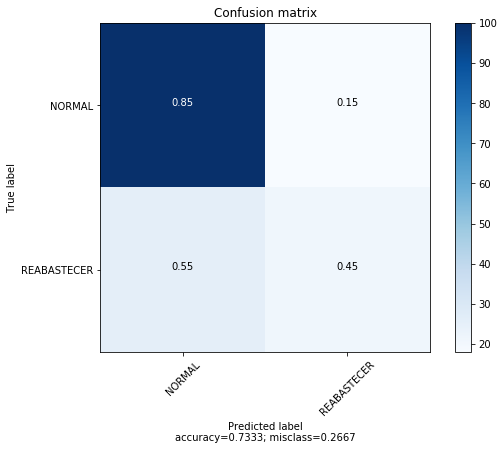

In [74]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [75]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-10 05:01:44--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.1’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-10 05:01:45 (42.5 MB/s) - ‘to_be_scored.csv.1’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [76]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [77]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [78]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [79]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [80]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [81]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,NORMAL
980,21,60,18,15,27,22,43,43,NORMAL
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,NORMAL


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [82]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

File 'results.csv' already exists in storage.

2020-09-10 05:02:31,704 - __PROJECT_LIB__ - ERROR - File 'results.csv' already exists in storage.
RuntimeError: File 'results.csv' already exists in storage.


RuntimeError: File 'results.csv' already exists in storage.

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
